# Assignment 2 - Computational Machine Learning
<b>Group Details</b> - <br>
Kunjar Supriya Rao - S3860925 <br>
Yeshaswi Aralaguppe Muralidhar - S3825856 <br>

## Research Goal
Image classification of European road traffic signs. <br>
The aim is to build and train a machine learning model to classify 28x28 gray-scale images according to - <br>
1) <b>Sign-shape </b> - diamond, hex, round, square, triangle<br>
2) <b>Sign-type </b> - stop, parking, giveway etc.

## Import the necessary libraries

In [3]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob

In [156]:
image_list = []
for filepath in glob.glob('./trafficsigns_dataset/*/*/*.png', recursive=True): #assuming gif
    filename = filepath.split("/")[-1]
    sign_type = filepath.split("/")[-2]
    sign_shape = filepath.split("/")[-3]
    label = filepath.split("/")[-3]

    img_file = Image.open(filepath)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels_2.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)
    
    ####HERE
    image_list.append((filepath, label, sign_type, value))
# Create a data frame
data = pd.DataFrame(data=image_list, columns=['image_path', 'label', 'sign_type', 'matrix'])

/Users/yeshaswiranjitha/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [85]:
sign_shape

'round'

In [91]:
data.head()

,image_path,label,sign_type,matrix
0,./trafficsigns_dataset/diamond/rightofway/0003...,diamond,rightofway,"[66, 67, 65, 66, 66, 65, 62, 59, 64, 66, 65, 6..."
1,./trafficsigns_dataset/diamond/rightofway/0180...,diamond,rightofway,"[58, 61, 60, 65, 75, 78, 81, 85, 83, 93, 97, 9..."
2,./trafficsigns_dataset/diamond/rightofway/0170...,diamond,rightofway,"[100, 102, 100, 101, 102, 100, 105, 104, 104, ..."
3,./trafficsigns_dataset/diamond/rightofway/0011...,diamond,rightofway,"[117, 133, 136, 105, 77, 126, 125, 92, 76, 112..."
4,./trafficsigns_dataset/diamond/rightofway/0123...,diamond,rightofway,"[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, 3..."


In [93]:
data['matrix'][0].shape

(784,)

In [6]:
data.shape

(3699, 2)

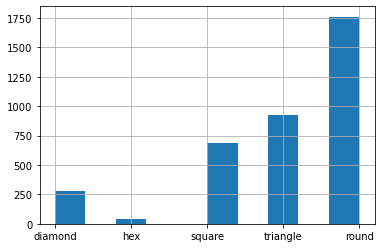

In [7]:
data.label.hist()
plt.show()

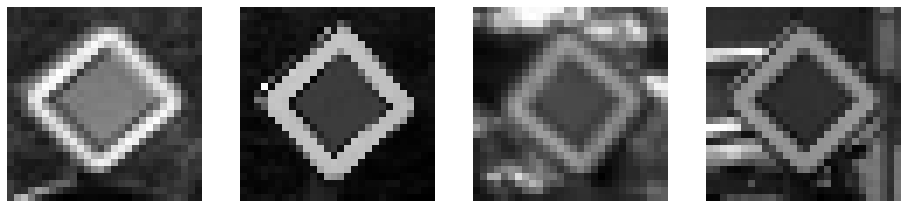

In [8]:
r_inx = np.random.choice(100, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [219]:
d = {'rightofway':0, 'stop':1, 'bicycle':2, 'limitedtraffic':3, 'noentry':4, 'nonparking':5, 'roundabout':6, 'speed':7, 'trafficdirective':8, 'traveldirection':9,  'continue':10, 'crossing':11, 'laneend':12, 'parking':13, 'giveway':14, 'warning':15}
merged_data['sign_type_num'] = merged_data['label'].map(d, na_action='ignore')

In [ ]:
d = {'rightofway':0, 'hex':1, 'square':2, 'triangle':3, 'round':4}
data['labels_num'] = data['sign_type'].map(d, na_action='ignore')

In [10]:
# train_df = data[data['isVal']==0].reset_index()
# validation_df = data[data['isVal']==1].reset_index()
# print('Train size: {}, Val size: {}'.format(train_df.shape[0], validation_df.shape[0] ) )
# N_train_images = train_df.shape[0]
# N_val_images = validation_df.shape[0]

# train_df.to_csv('TrainData.csv')
# validation_df.to_csv('ValData.csv')

KeyError: 'isVal'

In [11]:
data.dtypes

image_path    object
label         object
labels_num     int64
dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['image_path'],data['labels_num'],test_size =0.2, stratify=data['labels_num'])

In [14]:
data.head()

,image_path,label,labels_num
0,./trafficsigns_dataset/diamond/rightofway/0003...,diamond,0
1,./trafficsigns_dataset/diamond/rightofway/0180...,diamond,0
2,./trafficsigns_dataset/diamond/rightofway/0170...,diamond,0
3,./trafficsigns_dataset/diamond/rightofway/0011...,diamond,0
4,./trafficsigns_dataset/diamond/rightofway/0123...,diamond,0


In [15]:
X_train.shape

(2959,)

In [16]:
X_test.shape

(740,)

In [17]:
y_train.shape

(2959,)

In [18]:
y_test.shape

(740,)

<AxesSubplot:>

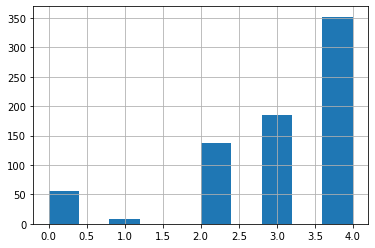

In [19]:
y_test.hist()

<AxesSubplot:>

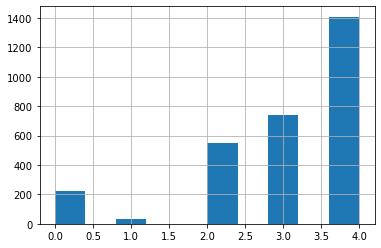

In [20]:
y_train.hist()

In [21]:
from sklearn.utils import class_weight

In [26]:
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(data),
#                                                  data)

TypeError: '<' not supported between instances of 'int' and 'str'

In [22]:
INPUT_DIM = (28,28,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 5

In [23]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

2022-05-25 19:29:24.781565: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-25 19:29:24.784139: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               602368    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 603,653
Trainable params: 603,653
Non-trainable params: 0
_________________________________________________________________


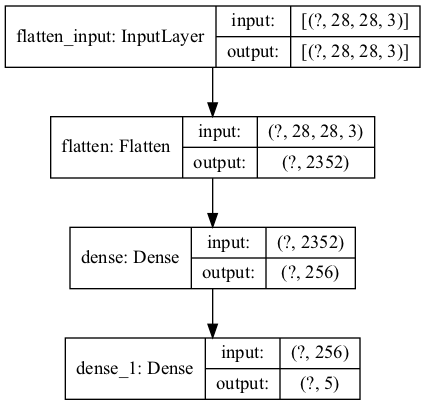

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

NameError: name 'train_df' is not defined

In [ ]:
train_df = data[data['isVal']==0].reset_index()
validation_df = data[data['isVal']==1].reset_index()
print('Train size: {}, Val size: {}'.format(train_df.shape[0], validation_df.shape[0] ) )
N_train_images = train_df.shape[0]
N_val_images = validation_df.shape[0]

train_df.to_csv('TrainData.csv')
validation_df.to_csv('ValData.csv')

In [52]:
# train_data=[]
# test_data=[]
Xtrain = X_train.to_frame()
Ytrain = y_train.to_frame()
Xtest = X_test.to_frame()
Ytest = y_test.to_frame()
# train_data.append((Xtrain, Ytrain))
# test_data.append((Xtest, Ytest))

In [59]:
Xtrain

,image_path
1354,./trafficsigns_dataset/triangle/warning/00252_...
2177,./trafficsigns_dataset/round/limitedtraffic/01...
320,./trafficsigns_dataset/hex/stop/00715_00003.png
2014,./trafficsigns_dataset/round/traveldirection/0...
22,./trafficsigns_dataset/diamond/rightofway/0180...
...,...
1924,./trafficsigns_dataset/triangle/warning/00757_...
3210,./trafficsigns_dataset/round/noparking/01435_0...
1171,./trafficsigns_dataset/triangle/giveway/01604_...
3308,./trafficsigns_dataset/round/bicycle/00452_000...


In [60]:
# train_df = pd.DataFrame(data=train_data, columns=['image_path', 'label'])
train_df = pd.DataFrame()
train_df['image_path']=Xtrain
train_df['label']=Ytrain

In [61]:
train_df.head()

,image_path,label
1354,./trafficsigns_dataset/triangle/warning/00252_...,3
2177,./trafficsigns_dataset/round/limitedtraffic/01...,4
320,./trafficsigns_dataset/hex/stop/00715_00003.png,1
2014,./trafficsigns_dataset/round/traveldirection/0...,4
22,./trafficsigns_dataset/diamond/rightofway/0180...,0


In [62]:
test_df = pd.DataFrame()
test_df['image_path']=Xtest
test_df['label']=Ytest

In [56]:
# test_df = pd.DataFrame(data=test_data, columns=['image_path', 'label'])

In [57]:
# type(X_train)

pandas.core.series.Series

In [63]:
test_df.head()

,image_path,label
2863,./trafficsigns_dataset/round/noentry/01055_000...,4
3233,./trafficsigns_dataset/round/bicycle/00686_000...,4
2737,./trafficsigns_dataset/round/noentry/00882_000...,4
667,./trafficsigns_dataset/square/parking/01192_00...,2
47,./trafficsigns_dataset/diamond/rightofway/0111...,0


In [64]:
train_df.to_csv('TrainData.csv')
test_df.to_csv('ValData.csv')

In [70]:
train_df['label']=train_df['label'].astype(str)


In [71]:
train_df['label'].dtype

dtype('O')

In [73]:
test_df['label']=test_df['label'].astype(str)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2959 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [75]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=1)

Epoch 1/100
93/93 [==============================] - 9s 93ms/step - loss: 1.2506 - categorical_accuracy: 0.4725 - val_loss: 1.1537 - val_categorical_accuracy: 0.5000
Epoch 2/100
93/93 [==============================] - 9s 95ms/step - loss: 1.1144 - categorical_accuracy: 0.5397 - val_loss: 1.0533 - val_categorical_accuracy: 0.5459
Epoch 3/100
93/93 [==============================] - 7s 77ms/step - loss: 1.0238 - categorical_accuracy: 0.6100 - val_loss: 0.9711 - val_categorical_accuracy: 0.6108
Epoch 4/100
93/93 [==============================] - 7s 73ms/step - loss: 0.9462 - categorical_accuracy: 0.6678 - val_loss: 0.8927 - val_categorical_accuracy: 0.6649
Epoch 5/100
93/93 [==============================] - 7s 72ms/step - loss: 0.8798 - categorical_accuracy: 0.7046 - val_loss: 0.8332 - val_categorical_accuracy: 0.7378
Epoch 6/100
93/93 [==============================] - 7s 73ms/step - loss: 0.8235 - categorical_accuracy: 0.7367 - val_loss: 0.7803 - val_categorical_accuracy: 0.7770
Epoc

93/93 [==============================] - 8s 84ms/step - loss: 0.2591 - categorical_accuracy: 0.9341 - val_loss: 0.2676 - val_categorical_accuracy: 0.9311
Epoch 51/100
93/93 [==============================] - 8s 81ms/step - loss: 0.2560 - categorical_accuracy: 0.9365 - val_loss: 0.2789 - val_categorical_accuracy: 0.9405
Epoch 52/100
93/93 [==============================] - 8s 88ms/step - loss: 0.2531 - categorical_accuracy: 0.9361 - val_loss: 0.2581 - val_categorical_accuracy: 0.9392
Epoch 53/100
93/93 [==============================] - 8s 90ms/step - loss: 0.2494 - categorical_accuracy: 0.9378 - val_loss: 0.2562 - val_categorical_accuracy: 0.9365
Epoch 54/100
93/93 [==============================] - 8s 89ms/step - loss: 0.2472 - categorical_accuracy: 0.9358 - val_loss: 0.2532 - val_categorical_accuracy: 0.9378
Epoch 55/100
93/93 [==============================] - 9s 92ms/step - loss: 0.2417 - categorical_accuracy: 0.9398 - val_loss: 0.2533 - val_categorical_accuracy: 0.9311
Epoch 56/10

93/93 [==============================] - 7s 80ms/step - loss: 0.1591 - categorical_accuracy: 0.9621 - val_loss: 0.1940 - val_categorical_accuracy: 0.9486
Epoch 100/100
93/93 [==============================] - 7s 80ms/step - loss: 0.1595 - categorical_accuracy: 0.9615 - val_loss: 0.1931 - val_categorical_accuracy: 0.9486


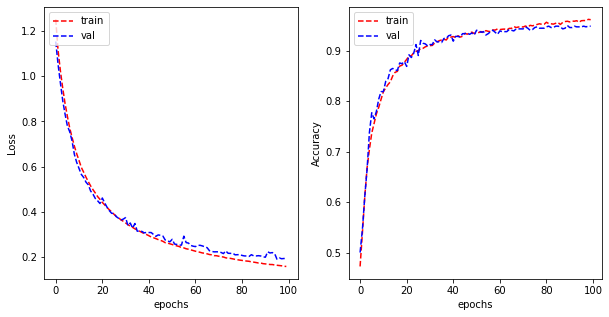

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

In [78]:
import cv2

In [79]:
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

In [160]:
csv1 = pd.read_csv("df.csv") 
csv1.head()
#csv1.shape

,Unnamed: 0,image_path,label,sign_type,matrix
0,0,./trafficsigns_dataset/diamond/rightofway/0003...,diamond,rightofway,[ 66 67 65 66 66 65 62 59 64 66 65 ...
1,1,./trafficsigns_dataset/diamond/rightofway/0180...,diamond,rightofway,[ 58 61 60 65 75 78 81 85 83 93 97 ...
2,2,./trafficsigns_dataset/diamond/rightofway/0170...,diamond,rightofway,[100 102 100 101 102 100 105 104 104 105 105 1...
3,3,./trafficsigns_dataset/diamond/rightofway/0011...,diamond,rightofway,[117 133 136 105 77 126 125 92 76 112 85 ...
4,4,./trafficsigns_dataset/diamond/rightofway/0123...,diamond,rightofway,[ 63 74 73 45 44 45 46 46 45 44 41 ...


In [179]:

csv2 = pd.read_csv("img_pixels_3.csv", header=None)
csv2.head()
csv2['image_path']=csv1['image_path']
#csv2.shape
merged_data = csv1.merge(csv2,on=["image_path"])
merged_data.shape
#data1 = pd.read_csv("data/sheet1.csv") data1.head()

(3699, 789)

In [165]:
merged_data.columns

Index(['Unnamed: 0', 'image_path',      'label',  'sign_type',     'matrix',
                  0,            1,            2,            3,            4,
       ...
                774,          775,          776,          777,          778,
                779,          780,          781,          782,          783],
      dtype='object', length=789)

In [163]:
type(merged_data)

pandas.core.frame.DataFrame

In [185]:
y= merged_data['label'].to_numpy()
n=len(merged_data)
#x=merged_data.drop("label", "Unnamed: 0","image_path","sign_type", "matrix", axis=1)
x=csv2.drop("image_path", axis=1)
# n=len(digits.images)
# x=digits.images.reshape((n, -1))
print(x.shape, n, y.shape)

(3699, 784) 3699 (3699,)


In [186]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,66,67,65,66,66,65,62,59,64,66,...,22,33,32,71,87,47,52,48,52,42
1,58,61,60,65,75,78,81,85,83,93,...,112,113,114,107,98,84,72,79,83,58
2,100,102,100,101,102,100,105,104,104,105,...,63,61,60,58,54,48,47,42,39,37
3,117,133,136,105,77,126,125,92,76,112,...,113,146,191,213,213,208,208,208,197,191
4,63,74,73,45,44,45,46,46,45,44,...,139,115,93,75,46,49,57,65,71,69


In [83]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('./trafficsigns_dataset/diamond/rightofway/')

for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

./trafficsigns_dataset/diamond/rightofway/
./trafficsigns_dataset/diamond/rightofway/00039_00001.png
[ 66  67  65  66  66  65  62  59  64  66  65  66  64  61  63  58  58  61
  60  59  65  63  57  61  55  50  56  47  64  66  66  63  60  65  61  64
  66  65  66  65  63  63  62  61  57  61  56  59  59  62  57  44  39  40
  37  44  63  60  63  62  57  55  61  63  65  62  66  65  61  78  68  66
  58  58  58  59  59  62  64  63  56  44  43  37  62  64  61  60  61  60
  61  63  66  66  67 103  41 110 128  71  47  59  57  57  60  65  61  63
  58  40  30  28  61  66  63  64  60  60  63  61  65  66 113  35 165 174
 173 168  81  48  58  60  58  56  58  60  61  47  25  24  62  65  60  61
  63  61  64  64  65 110  39 174 171 176 175 179 167  75  47  53  57  59
  55  57  56  46  32  30  63  64  63  63  61  62  62  64  99  48 177 173
 173 162 130 179 177 165  68  50  62  54  56  56  57  56  54  53  63  63
  66  59  60  60  60  86  59 174 174 174 157  44  68 136 177 177 165  61
  47  55  53  54  58  5

/Users/yeshaswiranjitha/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[ 93  93 111 118  72  63  67  58  38  26  41  77 113 112  97  77  88 108
  79  95  98 100  74  36  57  84  57  45  97  96 115 109  73  65  64  57
  40  28  43  80 117 113  96  79  91 106  78  82  88  87  64  39  52  57
  48  41  96  98 117 108  75  67  64  58  40  27  43  85 122 104  75  61
  98 118  77  83  93  85  64  38  50  75  59  45  99  92 117 110  74  64
  64  58  39  27  45  95  88  53  58  69 101  95  77  83  95  86  69  36
  58 100  66  48  96  92 119 109  72  63  65  59  39  31  56  70  45  80
  81  75  69  63  70  92  91  89  72  38  62 103  66  46  97 100 122 102
  70  64  66  58  41  46  50  46  85  90  90  83  71  59  56  77  95  93
  71  35  63 102  60  47  97 102 120  95  69  65  66  54  59  52  49  88
  92  82  71  83  86  70  55  55  83  89  63  36  69  95  63  54  92  94
 113  94  68  64  66  77  57  52  90  92  78  51  49  66  83  83  70  56
  58  78  57  37  70 150 197  89 105 111 124 108  73  68  71  54  62  92
  92  78  46  35  46  53  67  84  85  64  53  61  5

[ 39  51  41  47  37  31  28  25  26  26  22  19  17  22  31  19  34  83
  81  83  73  26  26  18  41  20  20 145  45  37  37  31  69  31  28  27
  23  23  21  18  19  19  29  30  58  83  78  71  77  24  30  19  46  19
  23 151  52  35  35  29  35  26  28  29  30  29  22  20  18  20  18  21
  47  74  86  45  57  24  33  21  48  20  25 151  43  31  36  53  44  27
  28  25  29  27  20  23  22  86 116 103  37  67  86  76  70  31  35  20
  52  18  35 155  37  41  38  31  35  29  30  27  30  23  26  18 118 122
 123 125 113  43  76  82  69  30  36  21  50  20  42 154  50  47  27  30
  31  32  28  27  26  34  18 127 128 127 131 127 128 108  41  85  66  31
  37  24  47  23  59 158  31  35  62  42  26  27  31  26  35  16 139 131
 127 126  40 127 128 130 104  42  58  30  38  24  44  21  67 155  39  25
  35  43  27  29  29  39  30 137 129 135 123  22  66  58 128 132 130 100
  27  30  38  27  43  22  84 156  28  11  30  30  25  30  35  40 137 133
 133 119  25  69  63  60  64 136 133 131  87  28  3

[122 117 118 126 123 117 126 151 148 119 120 158 151 125 118 134 149 156
 150 144 144 140 161 168 164 118  87  73 130 124 125 132 128 119 134 151
 141 107 114 138 131 118 119 132 145 139 141 137 139 150 163 195 151 108
  84  70 134 130 133 145 138 123 141 151 133  99  94 110 115 115 117 127
 141 135 143 144 162 164 157 168 126 100  84  82 134 134 132 129 129 129
 134 128 104  88  83  94 119 147 151 148 140 137 150 136 129 109 107  98
 103 109  98 100 125 126 129 137 135 127 126 118 100  91  95 113 158 183
 180 170 149 155 135 113 104  91  87  74  86  94  92  90 121 128 146 155
 146 127 121 113  98  96 121 162 197 202 199 194 164 147 122 112 107  98
  88  72  74  75  78  78 155 152 174 175 153 127 121 114 103 113 156 197
 182 160 162 173 192 176 143 122 100  90  85  77  70  69  69  69 159 163
 192 181 132 115 123 112 119 159 191 195 149 116 125 159 196 180 166 143
 117  98  83  76  70  65  63  62 146 173 198 167 114 112 120 122 154 198
 193 158 112  91  94 120 167 192 196 166 137 108  9

./trafficsigns_dataset/diamond/rightofway/01524_00001.png
[101 102  99  99  99  92  82  94  96  92  97  95  99 107 101  99 101 102
 100 103 101  99  99  99 103 103 103 103  94  96  98  99  99 101 104 103
 102 109 105 108 109 110 108 108 106 104 111 104 102  99  96  93  89  85
  82  76  71  65  63  61  61  59  57  57  55  52  55  49  44  41  45  53
  45  40  40  36  34  32  29  28  27  28  28  27  29  30  29  29  30  31
  32  32  31  34  34  35  34  43  93 109  66  36  33  32  34  35  31  29
  29  31  30  29  33  34  36  36  35  35  35  35  37  37  41  42  65 149
 172 161 132  73  40  39  38  37  35  33  32  34  32  30  35  34  34  34
  32  33  34  37  36  42  39  89 161 168 170 169 156 124  64  33  33  33
  29  27  27  26  24  23  23  22  21  22  22  23  24  22  36  41 110 176
 164 164 135 135 162 160 115  48  19  19  20  18  18  17  16  15  25  24
  21  21  24  26  26  35  45 133 166 174 159  87  40  96 144 167 156 105
  40  21  22  22  21  19  17  17  24  25  23  25  28  29  32  67 1

[ 67  63  62  63  63  62  65  64  59  65  71  74  78  75  68  69  69  65
  59  60  56  44  51 117 102  70 100 121  65  66  65  62  61  61  62  60
  57  66  71  71  70  69  67  65  65  63  56  58  42  42  54  75  67  70
 109 123  66  68  64  62  60  58  56  57  61  67  68  67  71  66  59  63
  63  57  53  53  40  43  47  49  56  72 107 112  68  68  61  61  59  56
  53  57  65  66  65  66  67  67  67  66  61  56  50  45  43  45  41  41
  55  64 105 132  67  66  60  59  58  54  56  60  63  62  63  68  60  80
 104  74  63  63  46  41  44  46  42  40  46  50  87 109  66  63  58  59
  57  51  54  59  63  64  71  72 102 133 144 125  90  58  47  42  41  45
  40  36  40  43  64  91  62  60  57  59  56  49  52  58  65  63  64  89
 162 206 184 174 131  84  52  42  42  41  36  34  37  41  46  53  57  58
  57  59  57  50  52  58  63  66 101 186 201 190 148 183 176 133  72  49
  45  38  35  34  36  40  41  40  54  57  56  56  54  53  52  58  59 109
 174 203 166 122 154 162 185 168 129  76  50  43  3

In [146]:
data.to_csv("df.csv")

In [147]:
data.head()

,image_path,label,sign_type,matrix
0,./trafficsigns_dataset/diamond/rightofway/0003...,diamond,rightofway,"[66, 67, 65, 66, 66, 65, 62, 59, 64, 66, 65, 6..."
1,./trafficsigns_dataset/diamond/rightofway/0180...,diamond,rightofway,"[58, 61, 60, 65, 75, 78, 81, 85, 83, 93, 97, 9..."
2,./trafficsigns_dataset/diamond/rightofway/0170...,diamond,rightofway,"[100, 102, 100, 101, 102, 100, 105, 104, 104, ..."
3,./trafficsigns_dataset/diamond/rightofway/0011...,diamond,rightofway,"[117, 133, 136, 105, 77, 126, 125, 92, 76, 112..."
4,./trafficsigns_dataset/diamond/rightofway/0123...,diamond,rightofway,"[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, 3..."


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [107]:
type(data['label'])

pandas.core.series.Series

In [108]:
len(data)

3699

In [118]:
type(x)

numpy.ndarray

In [144]:
y= data['label'].to_numpy()
n=len(data)
x=data['matrix'].to_numpy().reshape((n,-1))
# n=len(digits.images)
# x=digits.images.reshape((n, -1))
print(x.shape, n, y.shape)

(3699, 1) 3699 (3699,)


In [139]:
x=x.to_numpy()

In [140]:
print(x)

[array([ 66,  67,  65,  66,  66,  65,  62,  59,  64,  66,  65,  66,  64,
         61,  63,  58,  58,  61,  60,  59,  65,  63,  57,  61,  55,  50,
         56,  47,  64,  66,  66,  63,  60,  65,  61,  64,  66,  65,  66,
         65,  63,  63,  62,  61,  57,  61,  56,  59,  59,  62,  57,  44,
         39,  40,  37,  44,  63,  60,  63,  62,  57,  55,  61,  63,  65,
         62,  66,  65,  61,  78,  68,  66,  58,  58,  58,  59,  59,  62,
         64,  63,  56,  44,  43,  37,  62,  64,  61,  60,  61,  60,  61,
         63,  66,  66,  67, 103,  41, 110, 128,  71,  47,  59,  57,  57,
         60,  65,  61,  63,  58,  40,  30,  28,  61,  66,  63,  64,  60,
         60,  63,  61,  65,  66, 113,  35, 165, 174, 173, 168,  81,  48,
         58,  60,  58,  56,  58,  60,  61,  47,  25,  24,  62,  65,  60,
         61,  63,  61,  64,  64,  65, 110,  39, 174, 171, 176, 175, 179,
        167,  75,  47,  53,  57,  59,  55,  57,  56,  46,  32,  30,  63,
         64,  63,  63,  61,  62,  62,  64,  99,  48

In [130]:
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [128]:
y=digits.target
n=len(digits.images)
x=digits.images.reshape((n, -1))
print(x.shape, n, y.shape)

(1797, 64) 1797 (1797,)


In [188]:
y

array(['diamond', 'diamond', 'diamond', ..., 'round', 'round', 'round'],
      dtype=object)

In [194]:
d = {'diamond':0, 'hex':1, 'square':2, 'triangle':3, 'round':4}
merged_data['sign_type_num'] = merged_data['label'].map(d, na_action='ignore')

In [196]:
y=merged_data['sign_type'].to_numpy()

In [ ]:
# d = {'rightofway':0, 'stop':1, 'bicycle':2, 'limitedtraffic':3, 'noentry':4, 'nonparking':5, 'roundabout':6, 'speed':7, 'trafficdirective':8, 'traveldirection':9,  'continue':10, 'crossing':11, 'laneend':12, 'parking':13, 'giveway':14, 'warning':15}
# merged_data['sign_type_num'] = merged_data['label'].map(d, na_action='ignore')

In [235]:
d = {'rightofway':0, 'stop':1, 'bicycle':2, 'limitedtraffic':3, 'noentry':4, 'noparking':5, 'roundabout':6, 'speed':7, 'trafficdirective':8, 'traveldirection':9,  'continue':10, 'crossing':11, 'laneend':12, 'parking':13, 'giveway':14, 'warning':15}
merged_data['sign_type_num'] = merged_data['sign_type'].map(d, na_action='ignore')

In [236]:
y= merged_data['sign_type_num'].to_numpy()

In [237]:
# merged_data[pd.isna(merged_data).any(axis=1)]

In [238]:
merged_data['sign_type_num'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
3694    8
3695    8
3696    8
3697    8
3698    8
Name: sign_type_num, Length: 3699, dtype: int64

In [239]:
merged_data.tail()

,Unnamed: 0,image_path,label,sign_type,matrix,0,1,2,3,4,...,776,777,778,779,780,781,782,783,labels_num,sign_type_num
3694,3694,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,[ 29 26 25 28 25 23 21 21 22 25 33 ...,29,26,25,28,25,...,22,15,20,32,38,20,15,16,4,8
3695,3695,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,[ 31 29 45 58 63 47 34 39 52 58 61 ...,31,29,45,58,63,...,30,26,24,20,28,28,26,32,4,8
3696,3696,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,[ 50 49 49 48 50 48 34 25 28 28 26 ...,50,49,49,48,50,...,203,207,208,209,218,214,209,207,4,8
3697,3697,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,[111 114 113 110 111 115 112 110 117 121 120 1...,111,114,113,110,111,...,138,152,140,142,142,143,138,141,4,8
3698,3698,./trafficsigns_dataset/round/trafficdirective/...,round,trafficdirective,[119 124 103 121 124 101 108 104 75 76 72 1...,119,124,103,121,124,...,48,43,44,41,41,108,129,134,4,8


In [207]:
from sklearn.linear_model import LogisticRegression

In [240]:

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
clf=LogisticRegression()
fit=clf.fit(x_train,y_train)
pred=fit.predict(x_test)
confusion_matrix(y_test, pred)

/Users/yeshaswiranjitha/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 63,   0,   0,   0,   0,   2,   0,   1,   1,   0,   0,   0,   0,
          0,   0,   1],
       [  0,   9,   2,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,
          0,   0,   1],
       [  0,   0,  70,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1],
       [  0,   0,   0,  28,   1,   1,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0],
       [  2,   0,   1,   0,  84,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  4,   0,   2,   0,   0,  54,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,   0,   0,   0,   0,   0,  20,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  79,   1,   0,   0,   0,   0,
          0,   0,   1],
       [  0,   0,   0,   1,   0,   1,   0,   0,  47,   0,   0,   0,   0,
          0,   1,   0],
       [  0,   0,   1,   1,   2,   0,   0,   0,   0,  28,   0,   0,   0,
          0,   1,   0],
       [  0,   0,   0,   0,   

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        68
           1       1.00      0.60      0.75        15
           2       0.91      0.95      0.93        74
           3       0.90      0.90      0.90        31
           4       0.93      0.95      0.94        88
           5       0.87      0.90      0.89        60
           6       1.00      0.95      0.98        21
           7       0.99      0.98      0.98        81
           8       0.96      0.94      0.95        50
           9       0.88      0.85      0.86        33
          10       0.97      1.00      0.99        39
          11       1.00      1.00      1.00        27
          12       1.00      0.96      0.98        24
          13       1.00      0.98      0.99        91
          14       0.97      1.00      0.98        57
          15       0.96      0.95      0.96       166

    accuracy                           0.95       925
   macro avg       0.95   

In [210]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)

    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')

    return train_f1, val_f1

In [211]:
train2_f1, val2_f1 = get_f1_scores(clf, x_train, y_train, x_test, y_test)

In [212]:
train2_f1

1.0

In [213]:
val2_f1

0.8681377209234846

In [216]:
lambda_paras = np.logspace(-5, 2, num=25) # Providing range of values to select the best lambda value



train_performace = list()
valid_performace = list()



for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para,
    random_state=0, solver='liblinear', max_iter=1000 ,
    class_weight='balanced').fit(x_train, y_train.ravel())

    train_f1, val_f1 = get_f1_scores(clf, x_train, y_train, x_test, y_test)

    train_performace.append(train_f1)
    valid_performace.append(val_f1)

plt.plot([1.0/lambda_para for lambda_para in lambda_paras],
[tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras],
[vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()



KeyboardInterrupt: 